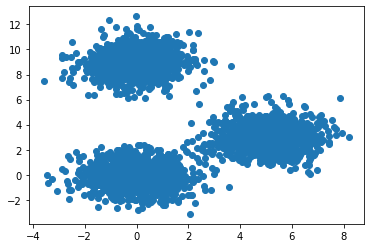

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import random

points = [np.random.randn(2) for _ in range(1000)]
points.extend([np.random.randn(2) + np.array([5,3]) for _ in range(1000)])
points.extend([np.random.randn(2) + np.array([0,9]) for _ in range(1000)])

points = np.array(points)
# X = []
# Y = []
# for p in points:
#   X.append(p[0])
#   Y.append(p[1])
# => *zip(points)
plt.scatter(*zip(*points))
plt.show()

In [12]:
def assign(p, centroids):
  min_dist_centroid_idx = -1
  min_dist = 9 ** 9
  for i,c in enumerate(centroids):
    dist = np.sum((c-p)**2)
    if min_dist > dist:
      min_dist_centroid_idx = i
      min_dist = dist
    
  return min_dist_centroid_idx
  # return min(range(k), key=lambda i: np.dot(centroids[i]-point, centroids[i]-point))
  # 
def compute_centroids(assignments, points, k):
  clusters = [[]for _ in range(k)]

  for a, p in zip(assignments, points):
    clusters[a].append(p)
  
  return [np.mean(c,axis=0) for c in clusters]


def kmeans(k, points):
  pre_assignments = []
  # 1.랜덤으로 centroid 선택
  centroids = points[np.random.choice(points.shape[0], replace=False, size=k)]

  for epoch in range(10):
    # 2. 각 점마다 가장 가까운 centroid의 cluster에 점 할당
    assignments = [assign(p,centroids) for p in points]

    # 3. cluster의 평균을 구해서 centroid 업데이트
    centroids = compute_centroids(assignments, points, k=k)

    # 4. cluster가 변했는지 확인하고, 변했으면 계속, 변하지 않았으면 멈춤
    if (assignments == pre_assignments):
      break

  return assignments, centroids #for 안에서 만든거 밖에서 사용 가능!!

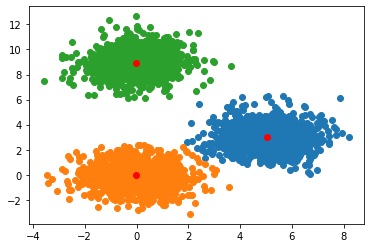

In [13]:
k = 3
a, c = kmeans(k, points)

clusters = [ [] for _ in range(k)]

for aa, p in zip(a, points):
  clusters[aa].append(p)

for clst in clusters:
  plt.scatter(*zip(*clst))

plt.scatter(*zip(*c), c="red")
plt.show()

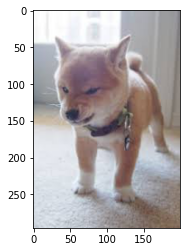

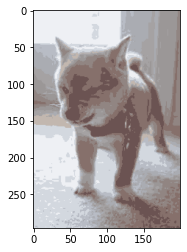

In [16]:
from PIL import Image

img = Image.open("dog.jpg")

width = 200
height = width * img.height // img.width # img.width : img.height = 200 : x

img = img.resize((width, height))

plt.imshow(img)
plt.show()

pixels = np.array(img) # 이미지를 배열로 만들어줌

k = 10

pixels = pixels.reshape(height*width, 3)

assignments, centroid = kmeans(k,pixels)

for i, a in zip(range(pixels.shape[0]), assignments):
  pixels[i] = centroid[a]

pixels = pixels.reshape(height, width,3)
img_remastered = Image.fromarray(pixels, "RGB")

plt.imshow(img_remastered)
plt.show()